In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sktime.datasets import load_japanese_vowels

In [2]:
X_train, y_train = load_japanese_vowels(split='train', return_type=None)
X_test, y_test = load_japanese_vowels(split='test', return_type=None)

max_length = 29

def pad_series(x):
    if len(x) < max_length:
        return np.pad(x, (0, max_length - len(x)), 'constant', constant_values=(0,))
    return x.values[:max_length]

X_train_padded = X_train.applymap(pad_series)
X_test_padded = X_test.applymap(pad_series)

X_train_arrays = [np.stack(row) for _, row in X_train_padded.iterrows()]
X_test_arrays = [np.stack(row) for _, row in X_test_padded.iterrows()]

X_train = np.stack(X_train_arrays, axis=0)
X_test = np.stack(X_test_arrays, axis=0)

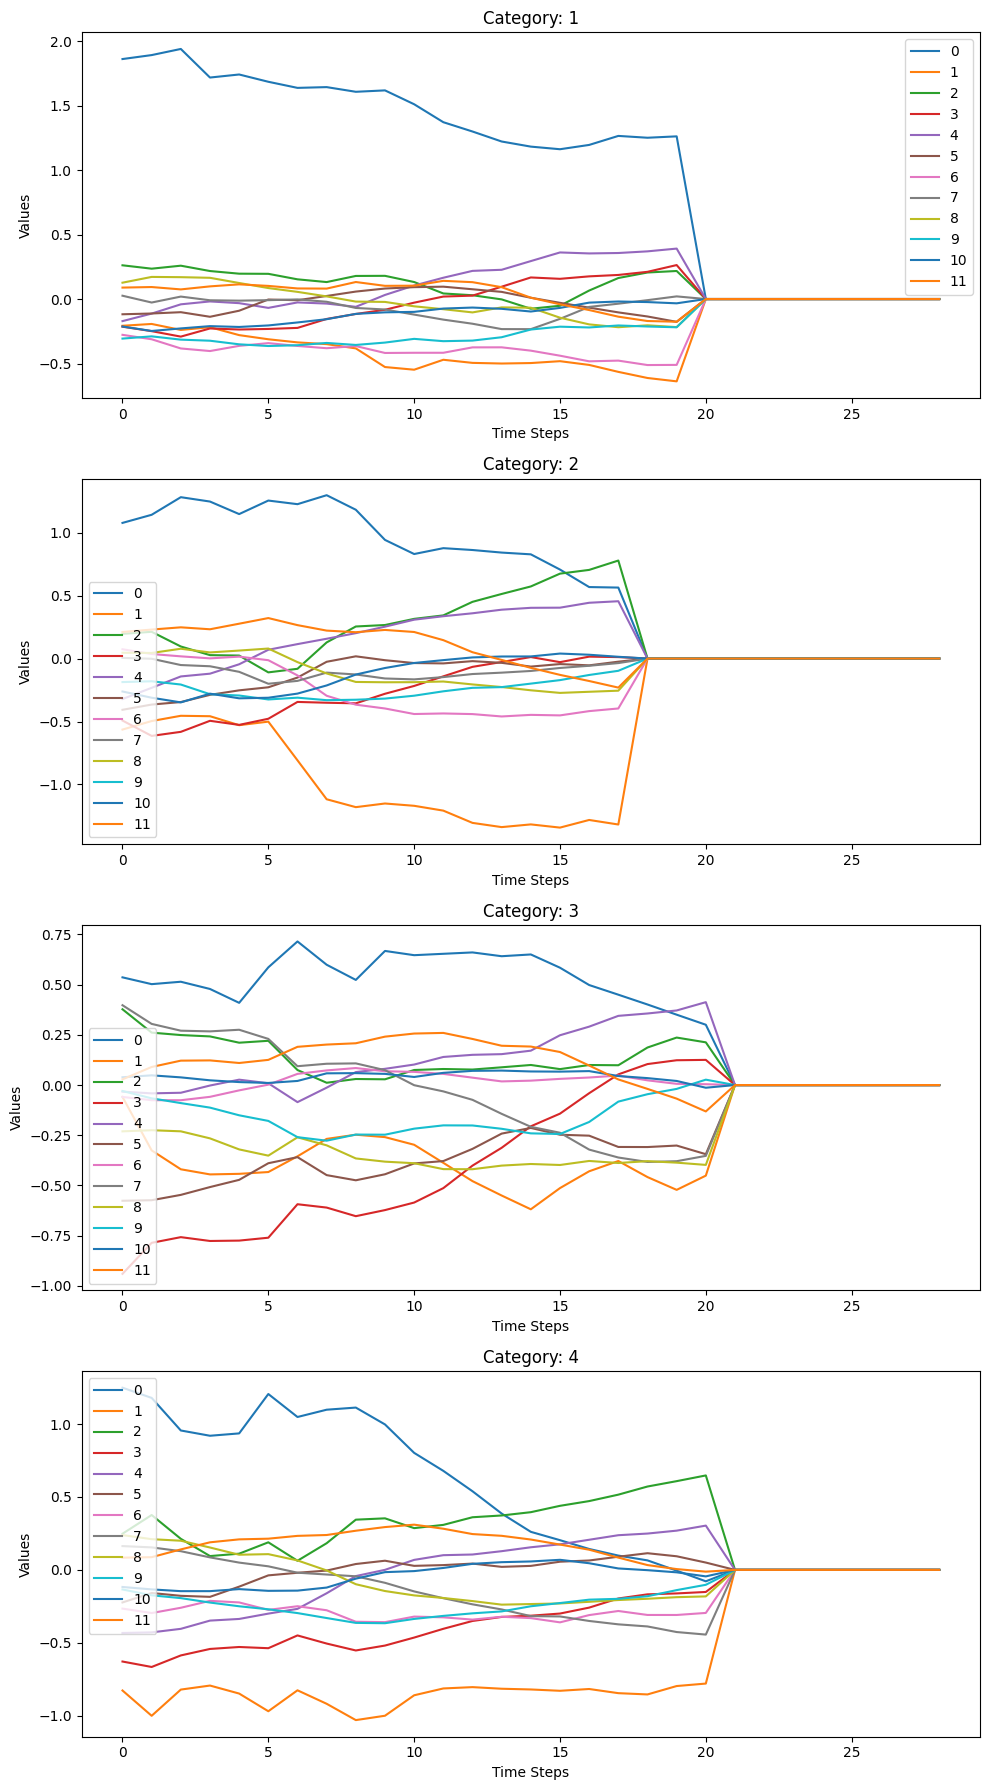

In [3]:
series_indices = np.arange(0, 30*4, 30)
categories = np.arange(1, 5, 1)
features = np.arange(0, 13, 1)

selected_series = X_train[series_indices]

fig, axes = plt.subplots(4, 1, figsize=(10, 18))

for i in range(4):  
    for j in range(selected_series.shape[1]):
        axes[i].plot(selected_series[i, j], label=features[j])

    axes[i].set_title(f"Category: {categories[i]}")
    axes[i].set_xlabel("Time Steps")
    axes[i].set_ylabel("Values")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Time Series Forest

In [4]:
from sktime.classification.ensemble import ComposableTimeSeriesForestClassifier

uni_X_train = X_train[:, 0:1, :]
uni_X_test = X_test[:, 0:1, :]

# Time Series Forest

# Fit

# Predict

# Accuracy

print(f'Accuracy: {clf_accuracy}%')

Accuracy: 55.68%
